In [37]:
using DataFrames
using CSV
using Gadfly
using GLM
using Statistics
using LinearAlgebra

#### Programming exercise 1: Linear regression

#### Linear regression with one variable: predict profits for a food truck

In [38]:
file = "./machine-learning-ex1/ex1/ex1data1.txt"
df = CSV.read(file, datarow = 1)
rename!(df, :Column1 => :X, :Column2 => :Y)
first(df, 5)

,X,Y
,Float64⍰,Float64⍰
1,6.1101,17.592
2,5.5277,9.1302
3,8.5186,13.662
4,7.0032,11.854
5,5.8598,6.8233


##### Plotting the data

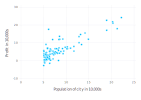

In [39]:
plt1 = plot(df, x = :X, y = :Y, Geom.point,
    Guide.xlabel("Population of city in 10,000s"),
    Guide.ylabel("Profit in 10,000s"))

In [40]:
# returns feature matrix with a column of ones added to account for the intercept
function designmat(data)
    # input: dataframe with data
    
    # return:
    # X: feature matrix with a column of ones added
    # y: target vector
    X = hcat(ones(size(data[1])), convert(Matrix, data))[:,1:end - 1]
    y = data[:, end]
    return X, y
end

designmat (generic function with 1 method)

In [41]:
# returns vector of residuals (predictions from model - output)
function residuals(feature_mat, output, weights)
    # input:
    # feature_mat: feature matrix
    # weights: vector of coefficients
    # output: target vector
    
    # return:
    # residuals (difference between predictions and output)
    predictions = weights' * feature_mat
    predictions - output'
end

residuals (generic function with 1 method)

In [42]:
# Compute the cost function J(θ)
function computeCost(feature_mat, output, weights)
    errors = residuals(feature_mat, output, weights)
    return (mean(errors.^2)/2) #broadcasting: dot operator
end

computeCost (generic function with 1 method)

In [43]:
# simple linear regression gradient descent
function slr_gd(feature_mat, output, α, weights, max_iter = 1500)
    # input:
    # feature_mat: feature matrix
    # output: target vector
    # α: learning rate
    # initial_weights: initial weights on coefficients
    # max_iter: maximum number of iterations
    
    # return:
    # weights: final weights
    # jtheta: vector (costs at each iteration)

    nobs = length(output)
    jtheta = Array{Float64}(undef, max_iter)

    for iter = 1:max_iter
        weights = weights - (α/nobs * ((residuals(feature_mat, output, weights) * feature_mat')'))
        jtheta[iter] = computeCost(feature_mat, output, weights)
    end
    return weights, jtheta
end

slr_gd (generic function with 2 methods)

In [44]:
# obtain matrix of features and target
features, target = designmat(df);

In [45]:
thetas = zeros(size(features)[2])
step_size = 0.01
max_iterations = 1500;

##### check cost function with different weights (see file ex1.m for values expected)

In [46]:
J = computeCost(features', target, thetas);
println("Cost with weights θ = [0., 0.] is $J")
println("Expected cost (approx) with weights θ = [0., 0.] is 32.07")

Cost with weights θ = [0., 0.] is 32.072733877455676
Expected cost (approx) with weights θ = [0., 0.] is 32.07


In [47]:
J = computeCost(features', target, [-1, 2]);
println("Cost with weights θ = [-1., 2.] is $J")
println("Expected cost (approx) with weights θ = [-1., 2.] is 54.24")

Cost with weights θ = [-1., 2.] is 54.24245508201238
Expected cost (approx) with weights θ = [-1., 2.] is 54.24


In [48]:
# call gradient descent
params, cost = slr_gd(features', target, step_size, thetas, max_iterations);

##### weights found by gradient descent (see file ex1.m for values expected)

In [49]:
println("θs found by gradient descent: $params")
println("Expected θ values: [-3.6303 1.1664]")

θs found by gradient descent: [-3.63029, 1.16636]
Expected θ values: [-3.6303 1.1664]


In [50]:
# solve problem using normal equations
X = features
y = target
neqs_est = pinv(X'X)X'y # pseudo inverse
println("θs found using normal equations: $([neqs_est[1], neqs_est[2]])")

θs found using normal equations: [-3.89578, 1.19303]


##### Plot of regression line. See ex1.pdf (After you are finished, ex1.m will use your final parameters to plot the linear fit. The result should look something like Figure 2). 

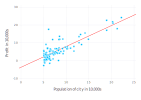

In [51]:
plot(df, x = :X, y = :Y, Geom.point,
    intercept = [params[1]], slope = [params[2]], Geom.abline(color = "red"),
    Guide.xlabel("Population of city in 10,000s"),
    Guide.ylabel("Profit in 10,000s"))

##### Make predictions on profits in areas of 35,000 and 70,000 people. See ex1.pdf (Your final values for θ will also be used to make predictions on profits in areas of 35,000 and 70,000 people).

In [52]:
predict1 = [1, 3.5]' * params
predict2 = [1, 7]' * params
(predict1 * 10000, predict2* 10000)
println("For population of 35,000, we predict a profit of $(round(predict1 * 10000; digits = 3))")
println("For population of 70,000, we predict a profit of $(round(predict2 * 10000; digits = 3))")


For population of 35,000, we predict a profit of 4519.768
For population of 70,000, we predict a profit of 45342.45


##### create contour plot for J($\theta$)

In [53]:
# create grid of values for θ₀ and θ₁
θ_zero = range(-10, length = 100, stop = 10)
θ_one = range(-1, length = 100, stop = 4)
J_vals = zeros(length(θ_zero), length(θ_one));

In [54]:
# compute costs for every pair of (θ₀, θ₁)
for i in 1:length(θ_zero)
    for j in 1:length(θ_one)
        J_vals[i, j] = computeCost(features', target, [θ_zero[i], θ_one[j]]);
    end
end

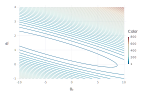

In [55]:
# generate contour plot
plot(z=J_vals, x = collect(θ_zero), y = collect(θ_one),
    Geom.contour(levels = 50),
    Guide.xlabel("θ₀"),
    Guide.ylabel("θ₁"))

#### Linear regression with muliple variables. Predict house prices.

In [56]:
# ex1data2.txt: training set of house prices in Portland, Oregon
file ="./machine-learning-ex1/ex1/ex1data2.txt"
df1 = CSV.read(file, datarow = 1)
rename!(df1, :Column1 => :size_sqft, :Column2 => :nbedrooms, :Column3 => :price)
first(df1, 5)

,size_sqft,nbedrooms,price
,Int64⍰,Int64⍰,Int64⍰
1,2104,3,399900
2,1600,3,329900
3,2400,3,369000
4,1416,2,232000
5,3000,4,539900


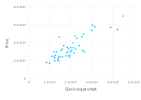

In [57]:
# price against size
plot(df1, x = :size_sqft, y = :price, 
    Geom.point,
    Guide.xlabel("Size in square feet"),
    Guide.ylabel("Price"))

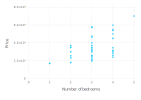

In [58]:
# price against number of bedrooms
plot(df1, x = :nbedrooms, y = :price, 
    Geom.point,
    Guide.xlabel("Number of bedrooms"),
    Guide.ylabel("Price"))

##### Feature normalization (see ex1.pdf, page 10: When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.)

In [59]:
# subtract mean from each feature and divide by corresponding standard deviation
# save values of mean and standard deviation for each feature
function feature_normalize(input_features)
    # normalizes features
    # input:
    # feature matrix
    
    # return:
    # tuple (normalized features, mean and sd used for normalization)
    X = ones(size(input_features)[1]) # create vector of ones
    stats = Dict{Symbol,Tuple{Float64, Float64}}() # save means and sds in dictionary indexed by name of feature

    for name in names(input_features)

        mean_name = mean(input_features[:, name])
        sd_name = std(input_features[:, name])
        X_name = (input_features[:,name] .- mean_name) ./ std(input_features[:,name])
        X = hcat(X, X_name) # concatenate vector of ones to normalized feature matrix
        stats[name] = (mean_name, sd_name) # save means, standard deviations
    end
    X, stats
end

feature_normalize (generic function with 1 method)

In [60]:
norm_features, feature_stats = feature_normalize(df1[:, 1:2]) #normalize
target = convert(Array{Float64,1}, df1[end]); #convert vector to matrix

In [61]:
# gradient descent 
thetas = zeros(size(norm_features)[2])
step_size = 0.01
max_iterations = 400

params, cost = slr_gd(norm_features', target, step_size, thetas, max_iterations);

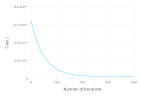

In [62]:
# convergence graph: plot cost as a function of iterations
plot(x = collect(1:1:max_iterations), y = cost, 
    Geom.line,
    Guide.xlabel("Number of iterations"),
    Guide.ylabel("Cost J")
    )

In [63]:
println("θs calculated from gradient descent: $params")

θs calculated from gradient descent: [3.34302e5, 1.00087e5, 3673.55]


In [64]:
# prediction for 1650 sq-ft house, 3 br house
test_data = [1, 1650, 3]
# normalize input values 
test_norm = [1, (test_data[2] - feature_stats[:size_sqft][1])/feature_stats[:size_sqft][2],
            (test_data[3] - feature_stats[:nbedrooms][1])/feature_stats[:nbedrooms][2]];
pred_price = test_norm' * params;

println("Predicted price of 1650 sq-ft house, 3 br house (using gradient descent): $(round(pred_price; digits = 3))")

Predicted price of 1650 sq-ft house, 3 br house (using gradient descent): 289314.62


In [65]:
# calculate θs using normal equations
neqs_θ = norm_features \ target
println("θs calculated from normal equations: $neqs_θ")

θs calculated from normal equations: [3.40413e5, 1.10631e5, -6649.47]


In [66]:
# prediction for 1650 sq-ft house, 3 br house
pred_price = test_norm' * neqs_θ
println("Predicted price of 1650 sq-ft house, 3 br house (using normal equations): $(round(pred_price; digits = 3))")

Predicted price of 1650 sq-ft house, 3 br house (using normal equations): 293081.464


##### Selecting learning rates. See page 12 of ex1.pdf (Try values of the learning rate α on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on))

In [67]:
max_iterations = 50 
step_size = 0.9 # starting value
# models is an array of tuples. Each tuple is (step_size, estimated θs from gradient descent, cost at each iteration)
models = Array{Tuple{String, Array{Float64, 1}, Array{Float64, 1}}}(undef, 0)

while step_size > 0.001
    params, cost = slr_gd(norm_features', target, step_size, thetas, max_iterations)
    push!(models, (string(step_size), params, cost))
    global step_size = round(step_size / 3; digits = 3)
end

In [68]:
# function returns a dataframe with the θs for different learning rates and the corresponding costs
function create_df()
    costs = Array{Any}(undef, 0, 3)
    for n in 1:length(models)
        costs = vcat(costs, hcat(collect(1:1:max_iterations),
                    fill(models[n][1], max_iterations),models[n][3]))
    end
    convert(DataFrame, costs)
end

create_df (generic function with 1 method)

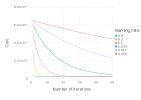

In [69]:
costs_df = create_df()
rename!(costs_df,
        :x1 => :iter_num,
        :x2 => :learning_rate,
        :x3 => :cost)

# plot cost versus number of iterations for each learning rate
plot(costs_df, x = :iter_num, y = :cost, color = :learning_rate, 
    Geom.line,
    Guide.xlabel("Number of iterations"),
    Guide.ylabel("Cost"))

In [70]:
max_iterations = 400
step_size = 0.9 # selected learning rate
params, cost = slr_gd(norm_features', target, step_size, thetas, max_iterations);

# use learning rate = 0.9
println("θs for model with learning rate = 0.9: $params")

pred_price = test_norm' * params;
println("Predicted price of 1650 sq-ft house, 3 br house (α = 0.9): $(round(pred_price; digits = 3))")

θs for model with learning rate = 0.9: [3.40413e5, 1.10631e5, -6649.47]
Predicted price of 1650 sq-ft house, 3 br house (α = 0.9): 293081.464


In [71]:
# solve using normal equations
X, y = designmat(df1)
neqs_θ = pinv(X'X)X'y;

In [72]:
# Predict price of 1650 sq-ft house, 3 br house
test_data = [1, 1650, 3]
pred_price = test_data' * neqs_θ
println("Predicted price of 1650 sq-ft house, 3 br house (normal equations): $(round(pred_price; digits = 3))")

Predicted price of 1650 sq-ft house, 3 br house (normal equations): 293081.464
